-  REGRESION LINEAR Python Sklearn  - 
   2 VARIABLES

 Formula de Regresion Linear con dos variables : Y = mX + c
 
 Y = variable dependiente (columna: Price_new)
 X = variable independiente a elegir (columnas: a elegir) 
 
 
 VARIABLES PROBADAS: "Number of Reviews", "Bedrooms_new", "Bathrooms_new", "Accommodates",  "Beds_new"
                      "Reviews Scores Value" y "Reviews Scores Rating" tienen Not Defined y no funciona. 
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import data set
df = pd.read_csv(r"C:\Users\Jo\Desktop\Data Analytics\data analytics\Glovo_bootcamp\Proyecto Final\Proyecto_Final\df_madridfinal.csv", sep=",")
df.head()

,Unnamed: 0,ID,Listing Url,Name,Description,Host ID,Host Since,Host Response Rate,Host Total Listings Count,Host Verifications,...,Calculated host listings count,Geolocation,Price_new,Price_new_weekly,Price_new_monthly,Beds_new,Bedrooms_new,Bathrooms_new,Is Super Host,Is Super Host YES/NO
0,0,15141125,https://www.airbnb.com/rooms/15141125,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",96019257,2016-09-20,100.0,2.0,"email,phone,facebook,reviews,jumio,government_id",...,2.0,"40.40745268477803, -3.7079954754432634",50.0,350.0,1500.0,1.0,0.0,1.0,True,Yes
1,1,9470166,https://www.airbnb.com/rooms/9470166,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",9885245,2013-11-08,100.0,13.0,"email,phone,reviews,jumio",...,13.0,"40.40831556101927, -3.705006385704201",50.0,350.0,1500.0,2.0,1.0,1.0,False,No
2,2,17444981,https://www.airbnb.com/rooms/17444981,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,118059488,2017-02-25,100.0,1.0,"email,phone,facebook,reviews,jumio,offline_gov...",...,1.0,"40.413722014584295, -3.7068231186536718",77.0,539.0,2310.0,2.0,1.0,1.5,False,No
3,3,3284565,https://www.airbnb.com/rooms/3284565,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",1892467,2012-03-09,100.0,3.0,"email,phone,reviews,jumio,government_id",...,3.0,"40.411263372718054, -3.6973054373712886",50.0,300.0,740.0,2.0,1.0,1.0,False,No
4,4,499911,https://www.airbnb.com/rooms/499911,2 bedroom apartment downtown Madrid,Bright and airy apartment in Central Madrid re...,2467212,2012-05-26,100.0,1.0,"email,phone,facebook,reviews,jumio",...,1.0,"40.41255625665078, -3.701155364799422",95.0,590.0,2850.0,4.0,2.0,1.0,True,Yes


 
 - PRUEBA COLUMNAS:  "Number of Reviews" y "Price_new" 
 

In [3]:
#Creamos un dataset con solo las columnas que nos sirven para hacer la regresion linear, Number of Reviews y Price_new
prueba_reg1 = df[['Number of Reviews', 'Price_new']]

prueba_reg1

,Number of Reviews,Price_new
0,30,50.0
1,97,50.0
2,7,77.0
3,6,50.0
4,72,95.0
...,...,...
12763,11,80.0
12764,85,80.0
12765,1,50.0
12766,122,70.0


In [4]:
# Definimos las dos variables X, y  con las columnas del dataset que elegimos.

X = prueba_reg1['Number of Reviews']    
y = prueba_reg1['Price_new']

In [5]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 23)

X_train

5911      12
3536      21
5201      30
11215     24
9508     128
        ... 
9704       4
11190     11
10185      0
9256      91
8787       2
Name: Number of Reviews, Length: 7660, dtype: int64

In [7]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_train = np.array(X_train).reshape(-1, 1)

X_train



array([[13],
       [27],
       [ 0],
       ...,
       [51],
       [ 0],
       [15]], dtype=int64)

In [8]:
X_test = np.array(X_test).reshape(-1, 1)

X_test

array([[13],
       [27],
       [ 0],
       ...,
       [51],
       [ 0],
       [15]], dtype=int64)

In [9]:

# Vamos a usar la funcion Linear Regression de la libreria sklearn.linear_model

from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [10]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Calcular valor c (interception)

c= lr.intercept_

c

66.4230392735162

In [12]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([-0.02942698])

In [13]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train = lr.predict(X_train)

y_pred_train

array([66.06991554, 65.80507274, 65.54022994, ..., 66.42303927,
       63.74518431, 66.36418532])

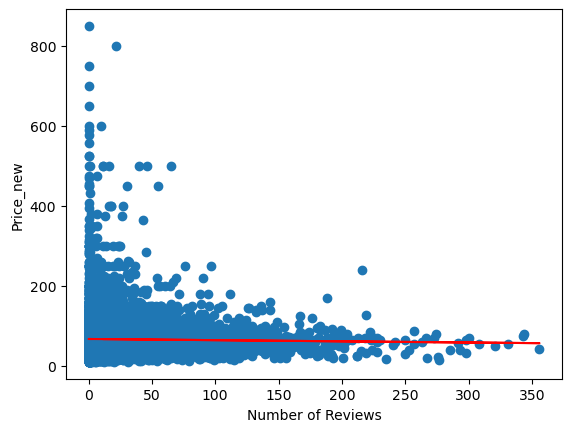

In [14]:
# Hacemos el grafico scatter + linea de Regresion 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color='red')
plt.xlabel('Number of Reviews')
plt.ylabel('Price_new')

plt.show()

 
 - PRUEBA COLUMNAS:  "Bedrooms_new" y "Price_new" 

In [15]:
#Creamos un dataset con solo las columnas Bedrooms_new y Price_new
prueba_reg2 = df[['Bedrooms_new', 'Price_new']]

prueba_reg2

,Bedrooms_new,Price_new
0,0.0,50.0
1,1.0,50.0
2,1.0,77.0
3,1.0,50.0
4,2.0,95.0
...,...,...
12763,1.0,80.0
12764,1.0,80.0
12765,1.0,50.0
12766,1.0,70.0


In [16]:
# Definimos las dos variables X, y  con las columnas del dataset que elegimos.

X = prueba_reg2['Bedrooms_new']    
y = prueba_reg2['Price_new']

In [17]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 23)

X_train

5911     1.0
3536     1.0
5201     0.0
11215    1.0
9508     1.0
        ... 
9704     1.0
11190    1.0
10185    1.0
9256     1.0
8787     1.0
Name: Bedrooms_new, Length: 7660, dtype: float64

In [18]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_train = np.array(X_train).reshape(-1, 1)

X_train

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
X_test = np.array(X_train).reshape(-1, 1)

X_test

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [20]:
# Vamos a usar la funcion Linear Regression de la libreria sklearn.linear_model

from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [21]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Calcular valor c (interception)

c= lr.intercept_

c

22.063206678685987

In [23]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([33.85632986])

In [24]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train2 = lr.predict(X_train)

y_pred_train2

array([55.91953653, 55.91953653, 22.06320668, ..., 55.91953653,
       55.91953653, 55.91953653])

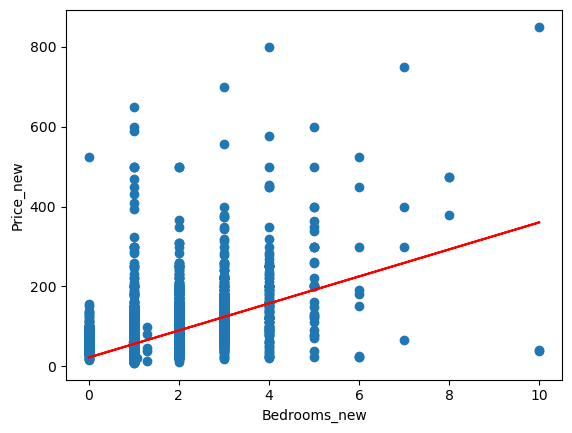

In [25]:
# Hacemos el grafico scatter + linea de Regresion 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train2, color='red')
plt.xlabel('Bedrooms_new')
plt.ylabel('Price_new')

plt.show()


- PRUEBA COLUMNAS:  "Bathrooms_new" y "Price_new" 


In [26]:
#Creamos un dataset con solo las columnas Bathrooms_new y Price_new
prueba_reg3 = df[['Bathrooms_new', 'Price_new']]

prueba_reg3

,Bathrooms_new,Price_new
0,1.0,50.0
1,1.0,50.0
2,1.5,77.0
3,1.0,50.0
4,1.0,95.0
...,...,...
12763,1.0,80.0
12764,1.0,80.0
12765,2.0,50.0
12766,1.0,70.0


In [27]:
# Definimos las dos variables X, y  con las columnas del dataset que elegimos.

X = prueba_reg3['Bathrooms_new']    
y = prueba_reg3['Price_new']

In [28]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 23)

X_train

5911     1.0
3536     1.0
5201     1.0
11215    1.0
9508     2.0
        ... 
9704     1.0
11190    1.0
10185    3.0
9256     1.0
8787     1.0
Name: Bathrooms_new, Length: 7660, dtype: float64

In [29]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_train = np.array(X_train).reshape(-1, 1)

X_train

array([[1.],
       [1.],
       [1.],
       ...,
       [3.],
       [1.],
       [1.]])

In [30]:
X_test = np.array(X_train).reshape(-1, 1)

X_test

array([[1.],
       [1.],
       [1.],
       ...,
       [3.],
       [1.],
       [1.]])

In [31]:
# Vamos a usar la funcion Linear Regression de la libreria sklearn.linear_model

from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [32]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Calcular valor c (interception)

c= lr.intercept_

c

29.6486202040574

In [34]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([28.69297297])

In [35]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train3 = lr.predict(X_train)

y_pred_train3

array([ 58.34159318,  58.34159318,  58.34159318, ..., 115.72753912,
        58.34159318,  58.34159318])

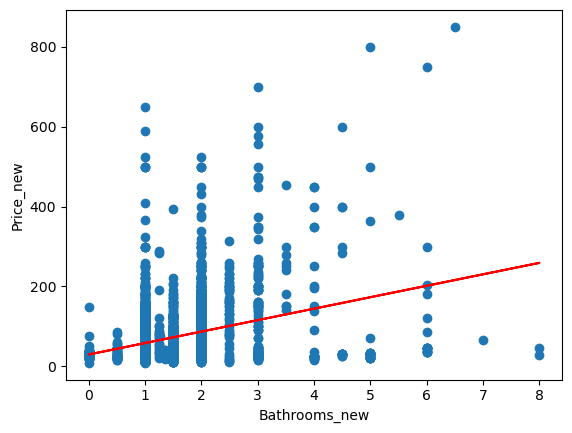

In [36]:
# Hacemos el grafico scatter + linea de Regresion 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train3, color='red')
plt.xlabel('Bathrooms_new')
plt.ylabel('Price_new')

plt.show()


- PRUEBA COLUMNAS:  "Accomodates" y "Price_new" 



In [38]:
#Creamos un dataset con solo las columnas Accommodates y Price_new
prueba_reg4 = df[['Accommodates', 'Price_new']]

prueba_reg4

,Accommodates,Price_new
0,2,50.0
1,4,50.0
2,4,77.0
3,2,50.0
4,5,95.0
...,...,...
12763,4,80.0
12764,4,80.0
12765,3,50.0
12766,4,70.0


In [39]:
# Definimos las dos variables X, y  con las columnas del dataset que elegimos.

X = prueba_reg4['Accommodates']    
y = prueba_reg4['Price_new']

In [40]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 23)

X_train

5911     2
3536     4
5201     2
11215    3
9508     2
        ..
9704     6
11190    2
10185    2
9256     2
8787     4
Name: Accommodates, Length: 7660, dtype: int64

In [41]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_train = np.array(X_train).reshape(-1, 1)

X_train

array([[2],
       [4],
       [2],
       ...,
       [2],
       [2],
       [4]], dtype=int64)

In [42]:
X_test = np.array(X_train).reshape(-1, 1)

X_test

array([[2],
       [4],
       [2],
       ...,
       [2],
       [2],
       [4]], dtype=int64)

In [43]:
# Vamos a usar la funcion Linear Regression de la libreria sklearn.linear_model

from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [44]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# Calcular valor c (interception)

c= lr.intercept_

c

14.745126767169353

In [46]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([16.02682421])

In [48]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train4 = lr.predict(X_train)

y_pred_train4

array([46.79877518, 78.8524236 , 46.79877518, ..., 46.79877518,
       46.79877518, 78.8524236 ])

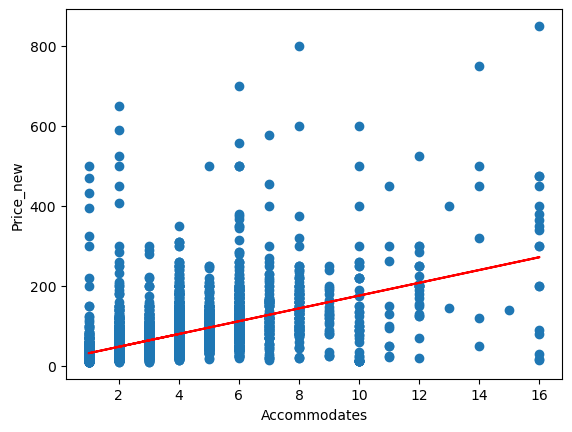

In [49]:
# Hacemos el grafico scatter + linea de Regresion 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train4, color='red')
plt.xlabel('Accommodates')
plt.ylabel('Price_new')

plt.show()


- PRUEBA COLUMNAS: "Beds_new" y  "Price_new"


In [66]:
#Creamos un dataset con solo las columnas Beds_new y Price_new
prueba_reg7 = df[['Beds_new', 'Price_new']]

prueba_reg7

,Beds_new,Price_new
0,1.0,50.0
1,2.0,50.0
2,2.0,77.0
3,2.0,50.0
4,4.0,95.0
...,...,...
12763,1.0,80.0
12764,3.0,80.0
12765,2.0,50.0
12766,2.0,70.0


In [67]:
# Definimos las dos variables X, y  con las columnas del dataset que elegimos.

X = prueba_reg7['Beds_new']    
y = prueba_reg7['Price_new']

In [68]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 23)

X_train

5911     1.0
3536     1.0
5201     1.0
11215    2.0
9508     1.0
        ... 
9704     3.0
11190    1.0
10185    1.0
9256     1.0
8787     2.0
Name: Beds_new, Length: 7660, dtype: float64

In [69]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_train = np.array(X_train).reshape(-1, 1)

X_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [70]:
# Modificamos el shape del output X_train y X_test para que sea bidimensional

X_test = np.array(X_train).reshape(-1, 1)

X_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [71]:
from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [72]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [73]:
# Calcular valor c (interception)

c= lr.intercept_

c

31.02717952567818

In [74]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([17.53554278])

In [75]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train7 = lr.predict(X_train)

y_pred_train7

array([48.56272231, 48.56272231, 48.56272231, ..., 48.56272231,
       48.56272231, 66.09826509])

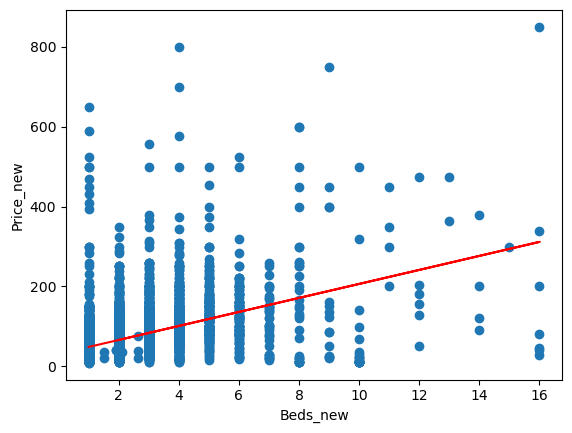

In [77]:
# Hacemos el grafico scatter + linea de Regresion 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train7, color='red')
plt.xlabel('Beds_new')
plt.ylabel('Price_new')

plt.show()